In [1]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary_DataSet.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
#checking for any null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
#checking types of data
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Converting the categorical object data to categorical numerical data for better understanding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
data1=['rank', 'discipline', 'sex']
for i in data1:
    df[i]=le.fit_transform(df[i].astype(str))

In [10]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


# Expolatory Data Analysis

Plotting graphs for better understanding

<AxesSubplot:xlabel='rank', ylabel='salary'>

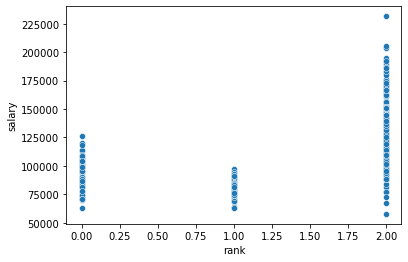

In [11]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

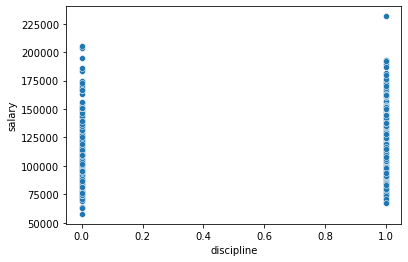

In [12]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

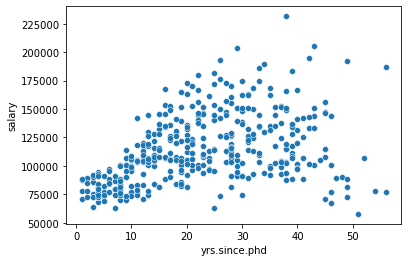

In [13]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

it is majorly disrtibuted in between 2 to 50

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

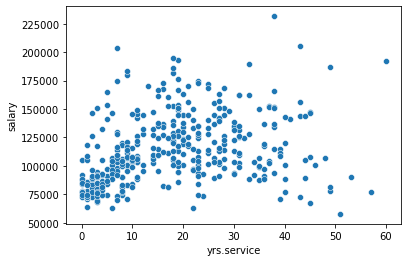

In [14]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

it is majorly distributed in between 0 to 50

<AxesSubplot:xlabel='sex', ylabel='salary'>

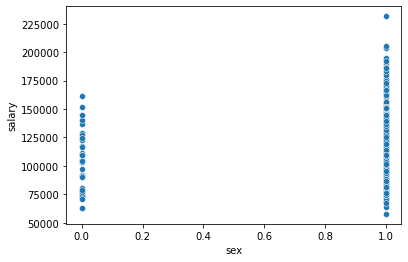

In [15]:
sns.scatterplot(x='sex',y='salary',data=df)

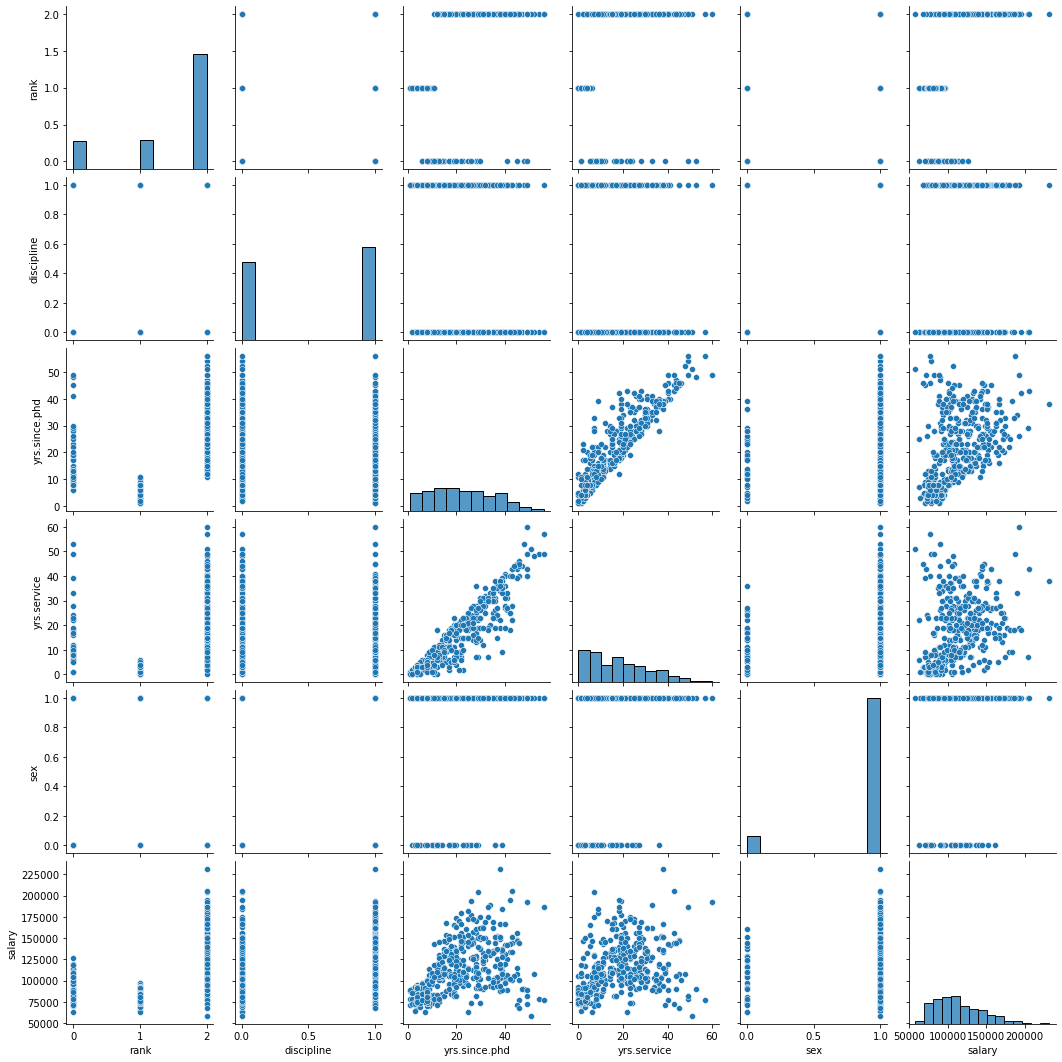

In [16]:
sns.pairplot(df)

# Deriving Correlations

In [17]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [18]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

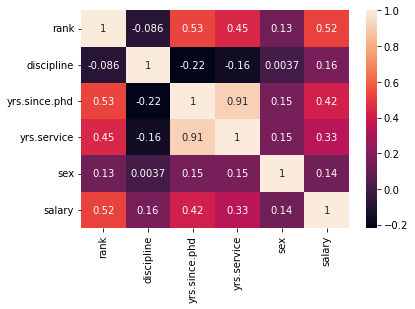

In [19]:
sns.heatmap(df.corr(),annot=True)

Derived results from Correlations

1. Rank is 52% co-related to salary
2. yrs.since.Phd is 42% co-related to salary
3. yrs.service is 33% co-related to salary
4. sex is 14% co-related to salary

# Descriptive Statistics

In [20]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

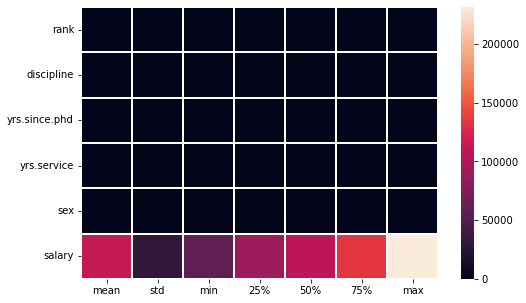

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidths=2,annot=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


Resuts according to Statistics

1. Rank :- Mean - 1.508816, STD. - 0.757486, Min - 0.000000, Max - 2.000000
2. Discipline :- Mean - 0.544081, STD. - 0.498682, Min - 0.000000, Max - 1.000000
3. yrs.since.phd :- Mean - 22.314861, STD. - 12.887003, Min - 1.000000, Max. - 56.000000
4. yrs.service :- Mean - 17.614610, STD. - 13.006024, Min - 0.000000, Max - 60.000000
5. sex :- Mean - 0.901763, STD. - 0.298010, Min - 0.000000, Max - 1.000000

# Checking Outliers

In [23]:
collist=df.columns.values
ncol=15
nrows=14

In [24]:
collist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

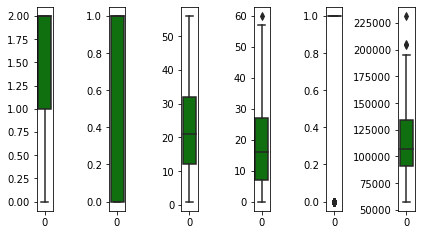

In [25]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Through above data it can be derived that there are only two columns that is 'salary' & 'yrs.service' that comprises with the outliners

# Checking Skewness

In [26]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Skewness threshold value is taken as +/-0.05. So columns having skewness - 

1. rank
2. yrs.service
3. sex
4. salary

# Normal Distribution Curve

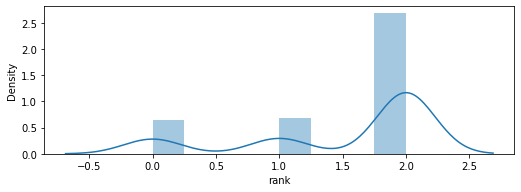

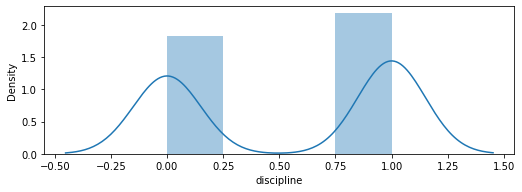

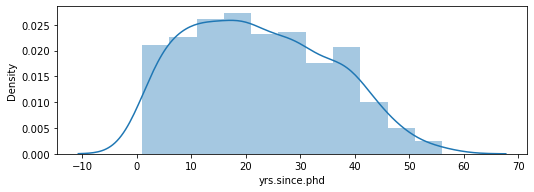

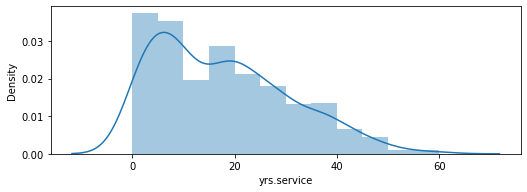

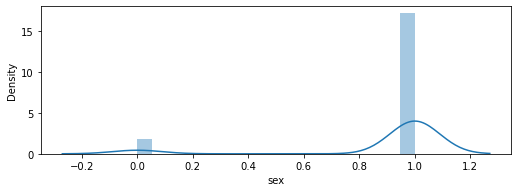

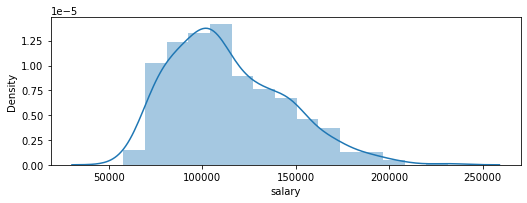

In [27]:
for i in range(0,len(collist)):
    plt.figure(figsize=(10*ncol,3*ncol))
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.show()

Normal distribution curve shows that the data is SKEWED

# Data Cleaning

In [28]:
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

In [29]:
df1=df.drop(["sex"],axis=1)
df1

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# Removing Outliers

> Using Z-Score Technique

In [30]:
z=np.abs(zscore(df1))
z.shape

(397, 5)

In [31]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [32]:
len(np.where(z>3)[0])

4

In [33]:
df1.drop([43, 131, 330, 364],axis=0)

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [34]:
df1=df1[(z<3).all(axis=1)]
df1

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# Removing Skewness

In [35]:
# independent Column
x=df1.iloc[:,:-1]
# target
y=df1.iloc[:,-1]

In [36]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

# Using Binary Regression Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=44)
print('x train shape:',x_train.shape)
print('y train shape:',y_train.shape)
print('x test shape:',x_test.shape)
print('y test shape:',y_test.shape)

x train shape: (263, 4)
y train shape: (263,)
x test shape: (130, 4)
y test shape: (130,)


# Linear Regression Model

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.intercept_

112839.40179072611

In [43]:
lr.coef_

array([14241.76776736,  6978.54812995, 12180.82193579, -7689.75780259])

In [44]:
lr.score(x_train,y_train)

0.4204152826193812

In [45]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [ 98660.49854297 122745.45431642 120017.14227901 120930.49968588
 122307.03378758  77745.00228981 124243.98745894 131140.39775115
 118336.03094152 141249.75575326 122281.53728825 135300.57872282
  86017.74538706 137618.31213832  78333.32546972 124686.63816906
 129796.59364088 111851.62221159  92202.63141463 125557.83498782
 127662.10611799 114320.75929156  76603.54495917 137307.32570581
  89095.41830567  94508.89463673  84616.89763982 132369.68017917
 124686.63816906 134015.16272069 126832.20877991 112398.73136915
 131497.28333863 115749.42363004  81440.04749472 121644.54289378
 110889.92438091  95464.47413812  92732.36941345 112615.90714013
  89095.41830567 117636.33194171 123746.70808938 126913.99700675
 114044.86512326  97840.24951627 103280.71647619 129286.27215546
 131497.28333863 115749.42363004 120903.42563648 122718.55227001
 117195.03663851 112027.33521957 122381.75322302 124596.8109586
  88331.77650926 124243.98745894 125966.20610981 132744.03847949
  93998.

In [46]:
print('Errors:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred))

Errors:
Mean Absolute Error : 17769.8453972219
Mean Squared Error : 498902872.08803874
Root mean Squared Error 22336.1337766418
r2 score : 0.42061352004802344


# Decission Tree Model

In [47]:
dtm=DecisionTreeRegressor()
dtm.fit(x_train,y_train)
dtm.score(x_train,y_train)

0.962970523175513

In [48]:
predr=dtm.predict(x_test)
print("predicted result ",predr)
print('actual result',y_test)

predicted result  [ 88825.   150917.    81700.   127257.5   67559.    74830.   111512.
 101000.   125192.    57800.   204000.   146856.    78500.   142023.
  83850.   130925.   107500.    93000.    90971.   121466.5  140096.
 113068.    74830.   165000.   113600.   105350.    97000.   140310.
 130925.   145098.   134778.    96938.   181257.   115800.    72750.
  67559.   104350.    80225.    92350.   126882.   113600.   134690.
 194800.   168635.   148800.    95611.    79858.   162150.   181257.
 115800.   101036.   109954.   103700.   148800.   131950.   130664.
  70700.   111512.    57800.   140310.    83558.25 127257.5  117704.
 130664.   189409.   105350.   107986.   106294.   175000.   101036.
 181257.   102600.    57800.    79858.    77517.5  181257.   121200.
 160400.   100102.   121466.5   92000.    71350.   161101.    70700.
  96545.   166605.   162150.    88175.   109646.    86250.    67559.
  73300.    70768.   100938.    92000.   165000.   131950.   101299.
 113600.    7985

In [49]:
print('Errors:')
print('Mean Absolute Error :',mean_absolute_error(y_test,predr))
print('Mean Squared Error :',mean_squared_error(y_test,predr))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predr)))
print('r2 score :',r2_score(y_test,predr))

Errors:
Mean Absolute Error : 23817.501923076925
Mean Squared Error : 1031134026.0081731
Root mean Squared Error 32111.275683288775
r2 score : -0.19747780001186443


# K- Neighbour Regression Model

In [50]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.627731708276079

In [51]:
predknr=knr.predict(x_test)
print("predicted result ",predknr)
print('actual result',y_test)

predicted result  [ 83127.2 141054.2 100745.8 126444.8 102790.6  88830.6 135919.  148814.
 115670.4 118123.  117767.8 118123.   76267.  124101.6  84776.4 121765.2
 117704.4 104917.   85035.  127340.8 135748.  104448.8  88830.6 142365.6
  98955.2  99812.4 100422.8 127161.2 121765.2 144165.8 130551.2 101749.8
 150877.8 126635.8  76200.  102790.6 112972.   79740.2  89830.  122978.6
  98955.2 113857.4 121908.2 145216.  112673.6 101235.   79370.2 153674.2
 150877.8 126635.8 127260.2 109584.2 108730.  114265.  124363.8 127089.4
  73160.  135919.   94143.4 132623.   83322.4 116774.8 147470.2 124199.4
 125163.  100862.4 127047.2 110750.4 125027.  110130.6 146397.8 117255.8
  94143.4  88386.6  76267.  150877.8 126624.4 146254.   89000.4 127340.8
  83770.   75247.  155391.6  76277.  132795.6 154320.8 155079.6 117039.2
 114233.6 106144.2 102790.6  78907.   85095.8  96422.8  85404.  140614.6
 113246.  101041.8  98955.2  79370.2  76200.  155079.6 157935.  110168.8
  74000.  127922.2 138485.   76267

In [52]:
print('Errors:')
print('Mean Absolute Error :',mean_absolute_error(y_test,predknr))
print('Mean Squared Error :',mean_squared_error(y_test,predknr))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predknr)))
print('r2 score :',r2_score(y_test,predknr))

Errors:
Mean Absolute Error : 16675.58923076923
Mean Squared Error : 524070589.02492315
Root mean Squared Error 22892.58808053216
r2 score : 0.3913857169218149


# Support Vector Regression Model

Kernel = RBF

In [53]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

-0.028991197007036007

Kernel = POLY

In [54]:
svp=SVR(kernel='poly')
svp.fit(x_train,y_train)
svp.score(x_train,y_train)

-0.028653310073450733

Kernel = Linear

In [55]:
svl=SVR(kernel='linear')
svl.fit(x_train,y_train)
svl.score(x_train,y_train)

-0.019126426981151523

# Cross Validation Score

In [56]:
from sklearn.model_selection import cross_val_score
j=[lr,dtm,knr,svr]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=6)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LinearRegression() is
[0.32068983 0.51823966 0.41472994 0.40814311 0.24836014 0.36247348]
0.3787726919349537
0.08391791484158788


Cross_Validation_score of DecisionTreeRegressor() is
[-0.11083367  0.26445199  0.25946027 -0.07983936  0.02115012 -0.50526226]
-0.025145487198981114
0.26072220764509324


Cross_Validation_score of KNeighborsRegressor() is
[0.27046086 0.43037223 0.47044836 0.38281574 0.31304932 0.26829634]
0.35590714302354326
0.07767703059856827


Cross_Validation_score of SVR() is
[-0.00119103 -0.00313292 -0.1245667  -0.01696764 -0.05204068 -0.22520958]
-0.070518090707401
0.08104193887325291




In [57]:
from sklearn.model_selection import KFold
j=[lr,dtm,knr,svr]
for n in j:
  print('K_Fold',n,'is')
  Kfold=KFold(5)
  score=cross_val_score(n,x,y,cv=Kfold)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

K_Fold LinearRegression() is
[0.24849052 0.57491121 0.41012385 0.26059421 0.31281385]
0.3613867271274098
0.12102232863596532


K_Fold DecisionTreeRegressor() is
[-0.3682094   0.25043912  0.01637414 -0.10160996 -0.60304396]
-0.16121001292591258
0.29752623061412675


K_Fold KNeighborsRegressor() is
[0.12828987 0.60529531 0.39021861 0.26551519 0.28025372]
0.3339145398396361
0.15915849586098452


K_Fold SVR() is
[ 0.00158844 -0.00698975 -0.12816237 -0.00413057 -0.2510532 ]
-0.07774949026333819
0.0992943385367589




# Choosing Model

In [58]:
import joblib
joblib.dump(knr,'Knr_File_Salary_Report.obj')

['Knr_File_Salary_Report.obj']